# Flipkart Reviews Sentiment Analysis

## Importing the necessary libraries

In [17]:
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

##### We will be using the NLTK (Natural Language Toolkit) to remove stopwords from our data. A stop word is a commonly used word (such as “the”, “a”, “an”, or “in”) that a search engine has been programmed to ignore. In NLP, stopwords are frequently filtered out to enhance text analysis and computational efficiency.

In [18]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Roma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Importing the dataset

In [19]:
data=pd.read_csv('flipkart_data.csv')
data.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


## Exploratory data analysis

<Axes: xlabel='rating', ylabel='count'>

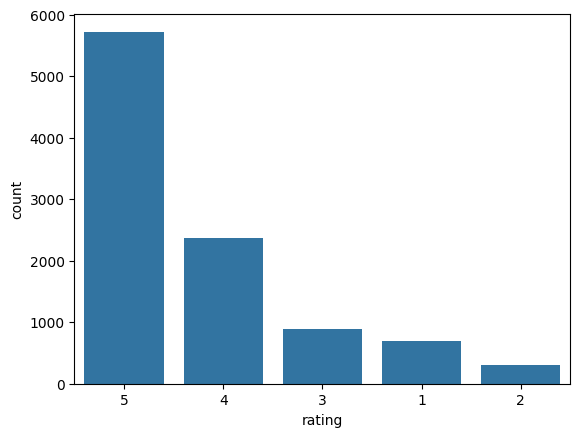

In [20]:
sns.countplot(data=data, x='rating', order=data.rating.value_counts().index)

#### We will label the rating as positive if it is more than 4 and negative if the rating is less than or equal to 3

In [21]:
labelled_ratings=[]
for i in range(len(data)):
    if data['rating'][i]>=4:
        labelled_ratings.append(1)
    else:
        labelled_ratings.append(0)

In [22]:
data['label']=labelled_ratings

## Pre-processing the data

In [23]:
from tqdm import tqdm 
def preprocess_text(text_data): 
    preprocessed_text = [] 
    for sentence in tqdm(text_data): 
        # Removing punctuations 
        sentence = re.sub(r'[^\w\s]', '', sentence) 
        # Converting lowercase and removing stopwords 
        preprocessed_text.append(' '.join(token.lower() for token in nltk.word_tokenize(sentence) if token.lower() not in stopwords.words('english'))) 
    return preprocessed_text 

In [24]:
preprocessed_review = preprocess_text(data['review'].values) 
data['review'] = preprocessed_review

100%|██████████| 9976/9976 [00:24<00:00, 415.40it/s]


In [25]:
data.head()

,review,rating,label
0,nice produt like design lot easy carry looked ...,5,1
1,awesome soundvery pretty see nd sound quality ...,5,1
2,awesome sound quality pros 78 hrs battery life...,4,1
3,think good product per quality also design qui...,5,1
4,awesome bass sound quality good bettary long l...,5,1


## Converting the text into vectors

In [26]:
vectorizer = TfidfVectorizer(max_features=2500) 
X = vectorizer.fit_transform(data['review'] ).toarray()

In [27]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Model training and evaluation

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.3)

#### Using a Decision tree classifier

In [32]:

from sklearn.tree import DecisionTreeClassifier 
  
model = DecisionTreeClassifier(random_state=0) 
model.fit(X_train,y_train) 
  

DecisionTreeClassifier(random_state=0)

#### testing the model

In [34]:
prediction=model.predict(X_train)

## Evaluation of the model

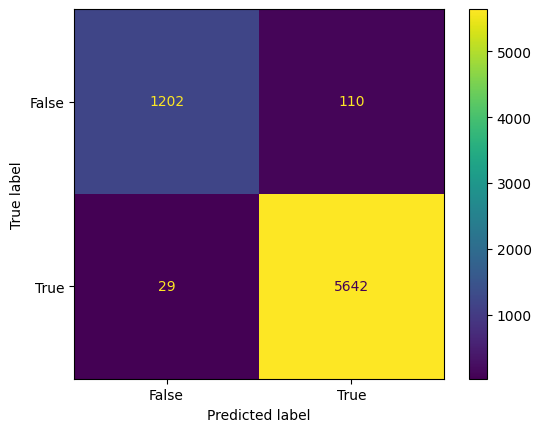

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_mat=confusion_matrix(y_train, prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_mat,  display_labels = [False, True]) 
cm_display.plot() 
plt.show()

In [42]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,prediction))

0.9800945152513246
